# Chapter 1: Foundations

### Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable, List, Dict

In [2]:
np.set_printoptions(precision=4)


### Illustration of Python lists vs Numpy Arrays

In [3]:
print("Python list opeartions:")
a = [1,2,3]
b = [4,5,6]
print("a+b", a+b)
try:
	print("a*b", a*b)
except:
	print("a*b has no meaning in Python lists")
print("Numpy array operations:")
a = np.array([1,2,3])
b = np.array([4,5,6])
print("a+b", a+b)
print("a*b", a*b)

Python list opeartions:
a+b [1, 2, 3, 4, 5, 6]
a*b has no meaning in Python lists
Numpy array operations:
a+b [5 7 9]
a*b [ 4 10 18]


### Basic functions

In [4]:
def square(x:ndarray)-> ndarray:
	"""
	Square each element in the input ndarray
	"""
	return np.pow(x,2)

def leaky_relu(x:ndarray)-> ndarray:
	"""
	Apply "Leaky ReLU"  function to each element in the input ndarray
	"""
	return np.maximum(0.2*x,x)

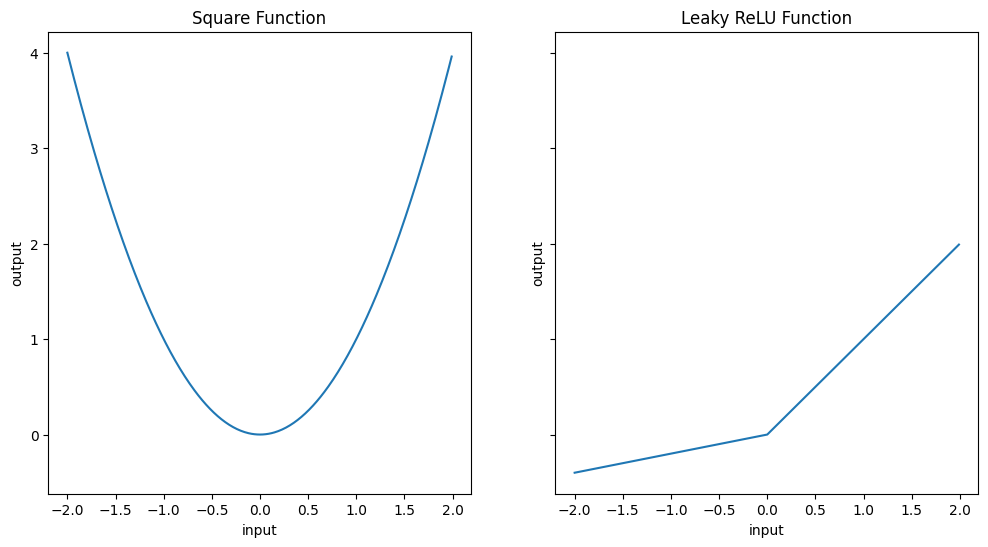

In [5]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(12,6))
input_range = np.arange(-2,2,0.01)
ax[0].plot(input_range, square(input_range))
ax[0].set_title("Square Function")
ax[0].set_xlabel("input")
ax[0].set_ylabel("output")

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title("Leaky ReLU Function")
ax[1].set_xlabel("input")
ax[1].set_ylabel("output")
plt.show();

In [6]:
def deriv(func: Callable[[ndarray],ndarray], input_:ndarray, diff:float=0.001)-> ndarray:
	"""
	Compute the derivative of the input function at the point input_
	"""
	return (func(input_+diff)-func(input_-diff))/(2*diff)

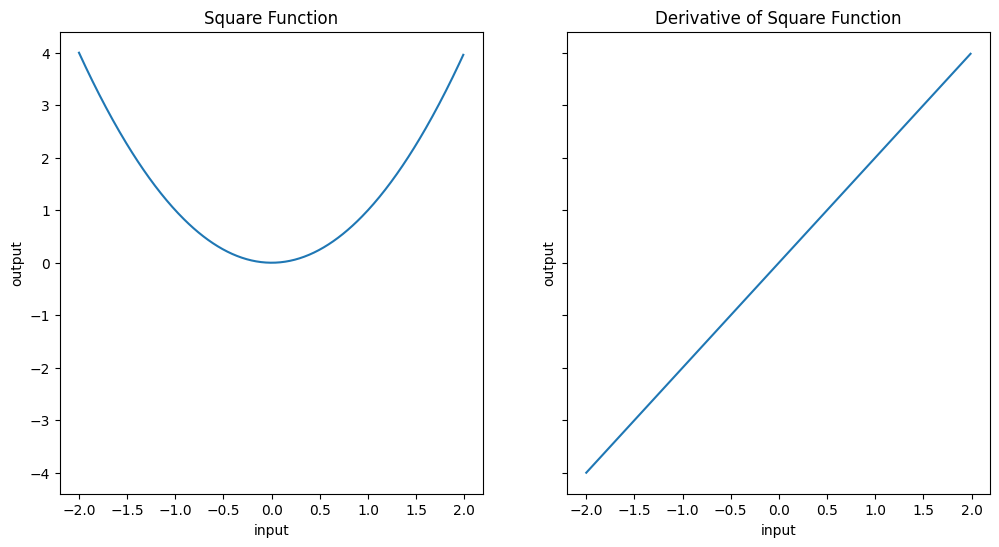

In [7]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(12,6))
input_range = np.arange(-2,2,0.01)
ax[0].plot(input_range, square(input_range))
ax[0].set_title("Square Function")
ax[0].set_xlabel("input")
ax[0].set_ylabel("output")

ax[1].plot(input_range, deriv(square, input_range))
ax[1].set_title("Derivative of Square Function")
ax[1].set_xlabel("input")
ax[1].set_ylabel("output")
plt.show();

### Function Chaining

In [8]:
from typing import List 

Array_Function = Callable[[ndarray], ndarray]
Chain = List[Array_Function]

def chain_length_2(chain:Chain, a:ndarray)-> ndarray:
	"""
	Evaluvates two functions i a row, in a "Chain"
	"""
	assert len(chain)==2, \
		"Length of input chain should be 2"
	f1 = chain[0]
	f2 = chain[1]
	return f2(f1(a))

In [9]:
def sigmoid(x:ndarray)-> ndarray:
	"""
	Computes the sigmoid function
	"""
	return 1/(1+np.exp(-x))

In [10]:
def chain_deriv_2(chain:Chain, input_range:ndarray)-> ndarray:
	"""
	Uses the chain rule to compute the derivative of two nested functions : (f2(f1(x)))' = (f2'(f1(x))) * (f1'(x))
	"""
	assert len(chain)==2, \
		"Length of input chain should be 2"
	assert input_range.ndim == 1, \
		"Function requires a 1 dimensional ndarray as input_range"
	f1 = chain[0]
	f2 = chain[1]
	f1_of_x = f1(input_range)

	df1dx = deriv(f1, input_range)
	df2du = deriv(f2, f1_of_x)
	return df2du * df1dx

In [11]:
def plot_chain(ax, chain:Chain, input_range:ndarray):
	"""
	Plots a chain function - a function made up of multiple consicutive ndarray -> ndarray mappings - Across the input range

	ax: matplotlib Subplot for plotting
	"""
	assert input_range.ndim == 1, \
		"Funtion requires a 1 dimensional ndarray as input_range"

	output_range = chain_length_2(chain, input_range)
	ax.plot(input_range, output_range)

In [12]:
def plot_chain_deriv(ax, chain:Chain, input_range:ndarray):
	"""
	Plots the derivative of a chain function - a function made up of multiple consicutive ndarray -> ndarray mappings - Across the input range

	ax: matplotib Sublplot for plotting
	"""
	assert input_range.ndim == 1, \
		"Funtion requires a 1 dimensional ndarray as input_range"
	output_range = chain_deriv_2(chain, input_range)
	ax.plot(input_range, output_range)

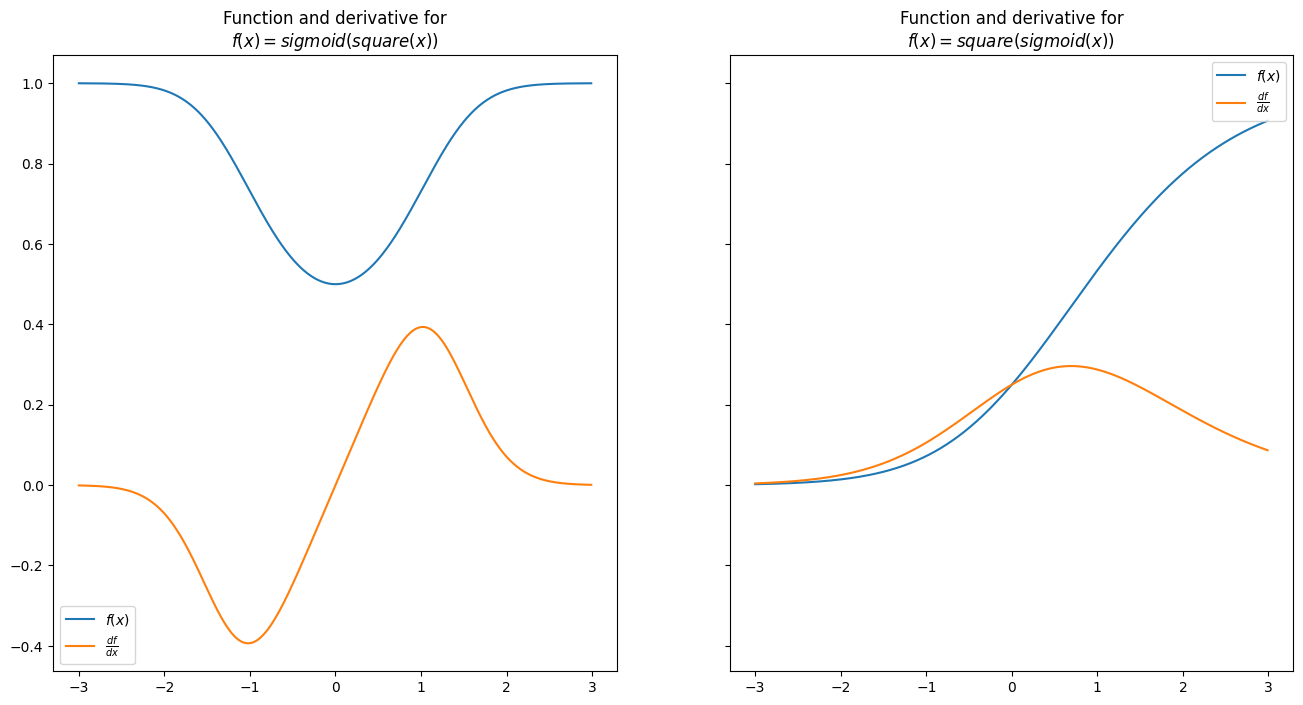

In [13]:

PLOT_RANGE = np.arange(-3,3,0.01)
fig, ax = plt.subplots(1,2, sharey=True, figsize=(16,8))
chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)


ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");



In [14]:
def chain_length_3(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates three functions in a row, in a "Chain".
    '''
    assert len(chain) == 3, \
    "Length of input 'chain' should be 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    return f3(f2(f1(x)))

In [15]:
def chain_deriv_3(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of three nested functions:
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # f1(x)
    f1_of_x = f1(input_range)

    # f2(f1(x))
    f2_of_x = f2(f1_of_x)

    # df3du
    df3du = deriv(f3, f2_of_x)

    # df2du
    df2du = deriv(f2, f1_of_x)

    # df1dx
    df1dx = deriv(f1, input_range)

    # Multiplying these quantities together at each point
    return df1dx * df2du * df3du

In [16]:
def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray,
               length: int=2) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings - across one range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    ax.plot(input_range, output_range)

def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray,
                     length: int=2) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of two nested functions.
    
    ax: matplotlib Subplot for plotting
    '''

    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    ax.plot(input_range, output_range)

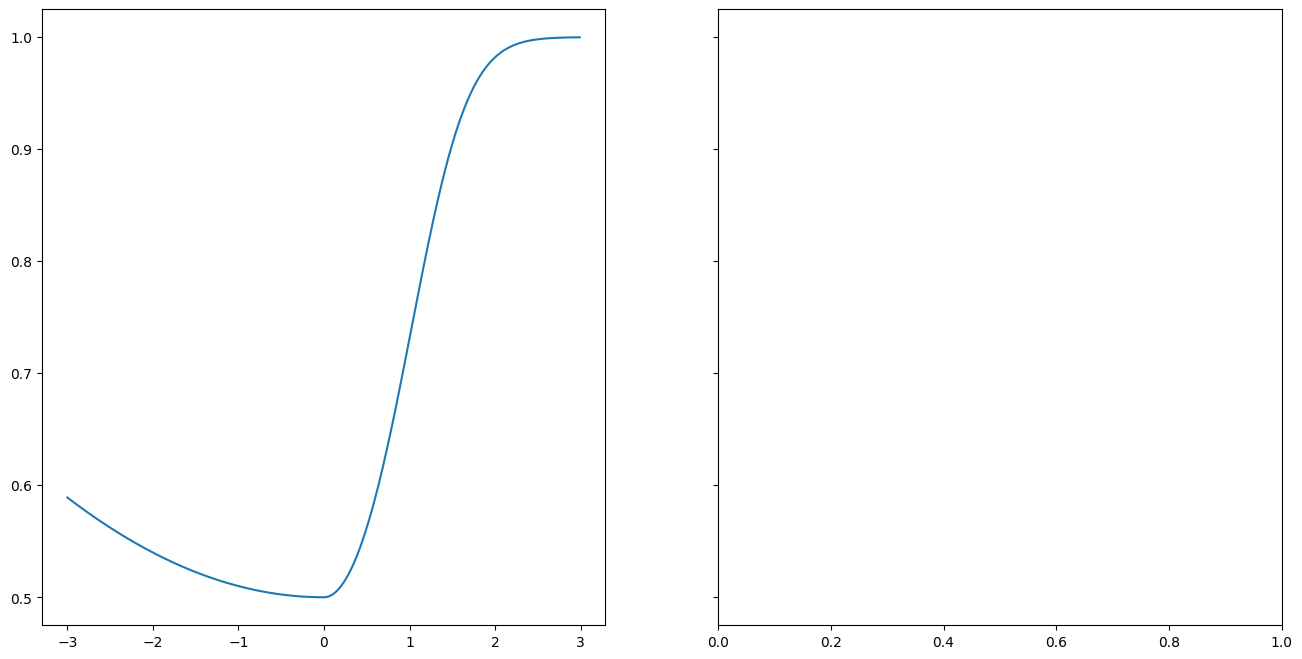

In [17]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)

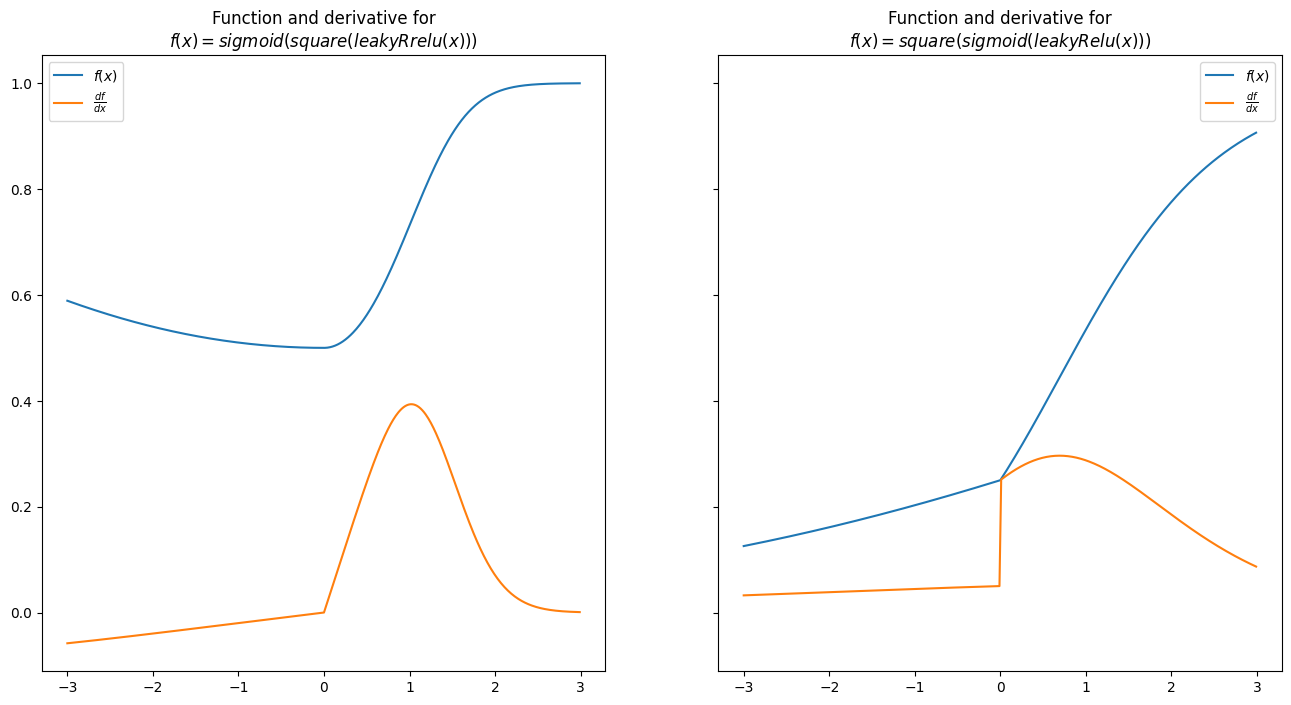

In [18]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE, length=3)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leakyRrelu(x)))$")

plot_chain(ax[1], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE, length=3)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(leakyRelu(x)))$");

### Functions with multiple inputs

In [19]:
def multiple_inputs_add(x:ndarray, y:ndarray, sigma:Array_Function)-> ndarray:
	"""
	Function with multiple inputs and addition, forward pass
	"""
	assert  x.shape == y.shape, \
		"Inputs to add should have the same shape"
	a = x+y
	return sigma(a)
	

In [20]:
def multiple_inputs_add_backward(x:ndarray, y:ndarray, sigma:Array_Function)-> float:
	"""
	Computes the derivative of this simple function with respect to both inputs
	"""
	assert  x.shape == y.shape, \
		"Inputs to add should have the same shape"
	# Comput forward pass
	a = x+y
	dsda = deriv(sigma, a)
	dadx , dady = 1,1
	return dsda * dadx , dsda * dady

### Function with matrix multiplication

In [21]:
def matmul_forward(X:ndarray, W:ndarray)-> ndarray:
	"""
	Compues the forward pass of a matrix multiplication
	"""
	assert X.shape[1] == W.shape[0], \
		"""
		For matrix multiplication the number of columns in the first matrix should match the number of rown in the second, instead the number of columns in the first array is {0} and the number of rows in the second array is {1}
		""".format(X.shape[1], W.shape[0])
	#matix multiplication
	return np.dot(X,W)



In [22]:
def matmul_backward_first(X:ndarray, W:ndarray)-> ndarray:
	"""
	Computes the backward pass of a matrix multiplication with respect to the first argument
	"""
	dNdx = np.transpose(W, (1,0))
	return dNdx

In [23]:
np.random.seed(190203)
X = np.random.randn(1,3)
W = np.random.randn(3,1)
print(X)
print(W)
print(matmul_forward(X,W))
print(matmul_backward_first(X,W))

[[ 0.4723  0.6151 -1.7262]]
[[ 0.9282]
 [-0.6075]
 [-1.2214]]
[[2.173]]
[[ 0.9282 -0.6075 -1.2214]]


In [24]:
def matrix_forward_extra(X:ndarray, W:ndarray, sigma:Array_Function)-> ndarray:
	"""
	Computes the forward pass of a function involving matrix multiplication, one extra function
	"""
	assert X.shape[1] == W.shape[0]
	N = np.dot(X, W)
	S = sigma(N)
	return S
	

Derivative of a function with matrix multiplication

In [25]:
def matrix_function_backward_1(X:ndarray, W:ndarray, sigma:Array_Function)-> ndarray:
	"""
	Computes the derivative of our matrix function with respect to the first element
	"""
	assert X.shape[1] == W.shape[0]
	N = np.dot(X, W)
	S = sigma(N)
	dSdN = deriv(sigma, N)
	dNdx = np.transpose(W, (1,0))
	return np.dot(dSdN, dNdx)

In [26]:
print(matrix_function_backward_1(X, W, sigmoid))

[[ 0.0852 -0.0557 -0.1121]]


In [27]:
X[0][2] = X[0][2]+0.01

In [28]:
X

array([[ 0.4723,  0.6151, -1.7162]])

In [29]:
print(matrix_function_backward_1(X, W, sigmoid))

[[ 0.086  -0.0563 -0.1132]]


### Matrix function with sum

In [34]:
def matrix_forward_sum(X:ndarray, W:ndarray, sigma:Array_Function)-> float:
	"""
	Computing the result of the forward pass of this function with input ndarrays
	X and W and function sigma.
	"""
	assert X.shape[1] == W.shape[0]
	N = np.dot(X, W)
	S = sigma(N)
	L = np.sum(S)
	return L

In [39]:
def matrix_function_backward_sum1(X:ndarray, W:ndarray, sigma:Array_Function)->float:
	"""
	Compute the derivative of matrix function with a sum with respect to the first matrix input
	"""
	assert X.shape[1]== W.shape[0]
	N = np.dot(X, W)
	S = sigma(N)
	L = np.sum(S)
	dLdS = np.ones_like(S)
	dSdN = deriv(sigma, N)
	dLdN = dLdS * dSdN
	dNdX = np.transpose(W,(1,0))
	dLdX = np.dot(dSdN, dNdX)
	return dLdX

In [50]:
np.random.seed(190204)
X = np.random.randn(3,3)
W = np.random.randn(3,2)
print("X:", X)
L = matrix_forward_sum(X, W, sigmoid)
print("L:", L)

dLdX = matrix_function_backward_sum1(X,W,sigmoid)
print("dLdX:", dLdX)


X: [[-1.5775 -0.6664  0.6391]
 [-0.5615  0.7373 -1.4231]
 [-1.4435 -0.3913  0.1539]]
L: 2.3754951014116954
dLdX: [[ 0.2489 -0.3748  0.0112]
 [ 0.126  -0.2781 -0.1395]
 [ 0.2299 -0.3662 -0.0225]]


In [52]:
X1 = X.copy()
X[0,0] += 0.001
print((matrix_forward_sum(X1,W,sigmoid)-L)*1000)

0.24889684117601618


In [53]:
X

array([[-1.5755, -0.6664,  0.6391],
       [-0.5615,  0.7373, -1.4231],
       [-1.4435, -0.3913,  0.1539]])

### Plotting

In [55]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function,
                                modify_x11: bool = False,
                                x11: float = 0.5) -> float:
    '''
    Computing the result of the forward pass of this function with
    input Tensors X and W and function sigma.
    '''
    assert X.shape[1] == W.shape[0]
    
    if modify_x11:
        X1 = X.copy()
        X1[0][0] = x11

    # matrix multiplication
    N = np.dot(X1, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # sum all the elements
    L = np.sum(S)

    return L

In [56]:
x11s = np.arange(X[0][0] - 1, X[0][0] + 1, 0.01)
Ls = [matrix_function_forward_sum(X, W, sigmoid,
                                  modify_x11 = True,
                                  x11=x11) for x11 in x11s]

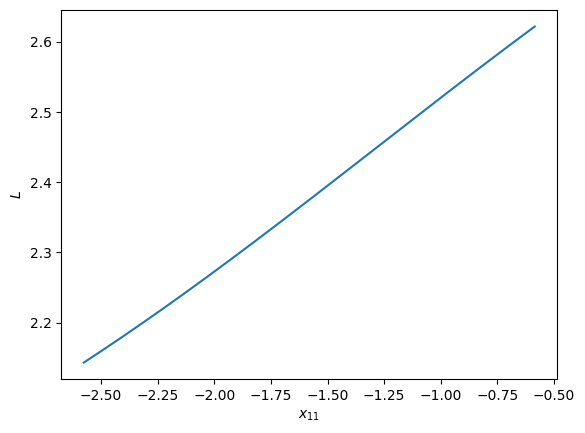

In [57]:
plt.plot(x11s, Ls);
# plt.title("Value of $L$ as $x_{11}$ changes holding\nother values of $X$ and $W$ constant")
plt.xlabel("$x_{11}$")
plt.ylabel("$L$");
# plt.savefig(IMG_FOLDER_PATH + "18_x11_vs_L.png");
# plt.savefig(PDF_IMG_FOLDER_PATH + "18_x11_vs_L.pdf");